Setup & imports

In [9]:
import sys, os

# Fix path so Jupyter can import scripts.config
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scripts.config import PROCESSED_DATA
from scripts.eda_helpers import (
    load_cleaned_reviews, load_sentiment_results, merge_sentiment_and_cleaned,
    plot_reviews_per_app, plot_rating_distribution, plot_avg_rating_over_time,
    plot_sentiment_distribution, plot_wordcloud_from_text, top_n_words, plot_top_keywords_bar
)

plt.style.use("seaborn-v0_8")
%matplotlib inline


In [10]:
# Cell 2 - Load data
cleaned = load_cleaned_reviews()
sentiment = load_sentiment_results()
print("Cleaned rows:", len(cleaned))
print("Sentiment rows:", len(sentiment))

# If sentiment and cleaned have different column names, inspect head
display(cleaned.head())
display(sentiment.head())


Cleaned rows: 1139
Sentiment rows: 1139


,content,score,at,app,clean_content
0,it's special for me,5,2025-11-29 15:54:14,CBE,it s special for me
1,Make it user friendly.,2,2025-11-29 08:17:45,CBE,make it user friendly
2,maaliif daddafee install gaafata,3,2025-11-28 13:36:32,CBE,maaliif daddafee install gaafata
3,good app,5,2025-11-28 11:33:17,CBE,good app
4,This application is very important and advanta...,5,2025-11-27 23:08:20,CBE,this application is very important and advanta...


,content,score,at,app,clean_content,compound,sentiment
0,it's special for me,5,2025-11-29 15:54:14,CBE,it s special for me,0.4019,positive
1,Make it user friendly.,2,2025-11-29 08:17:45,CBE,make it user friendly,0.4939,positive
2,maaliif daddafee install gaafata,3,2025-11-28 13:36:32,CBE,maaliif daddafee install gaafata,0.0000,neutral
3,good app,5,2025-11-28 11:33:17,CBE,good app,0.4404,positive
4,This application is very important and advanta...,5,2025-11-27 23:08:20,CBE,this application is very important and advanta...,0.5198,positive


In [11]:
# Cell 3 - Merge
merged = merge_sentiment_and_cleaned(cleaned, sentiment)
print("Merged rows:", len(merged))
display(merged.head())

Merged rows: 1139


,content,score,at,app,clean_content,content_s,score_s,app_s,compound,sentiment
0,it's special for me,5,2025-11-29 15:54:14,CBE,it s special for me,it's special for me,5,CBE,0.4019,positive
1,Make it user friendly.,2,2025-11-29 08:17:45,CBE,make it user friendly,Make it user friendly.,2,CBE,0.4939,positive
2,maaliif daddafee install gaafata,3,2025-11-28 13:36:32,CBE,maaliif daddafee install gaafata,maaliif daddafee install gaafata,3,CBE,0.0000,neutral
3,good app,5,2025-11-28 11:33:17,CBE,good app,good app,5,CBE,0.4404,positive
4,This application is very important and advanta...,5,2025-11-27 23:08:20,CBE,this application is very important and advanta...,This application is very important and advanta...,5,CBE,0.5198,positive


In [12]:
# Cell 4 - Basic KPIs
total_reviews = len(merged)
by_app = merged['app'].value_counts().rename_axis('app').reset_index(name='counts')
avg_rating = merged.groupby('app')['score'].mean().reset_index(name='avg_rating')
missing_sentiment = merged['sentiment'].isna().sum()

print(f"Total reviews (merged): {total_reviews}")
display(by_app)
display(avg_rating)
print("Missing sentiment labels:", missing_sentiment)


Total reviews (merged): 1139


,app,counts
0,CBE,384
1,Amole,382
2,BOA,373


,app,avg_rating
0,Amole,3.952880
1,BOA,3.353887
2,CBE,4.101562


Missing sentiment labels: 0


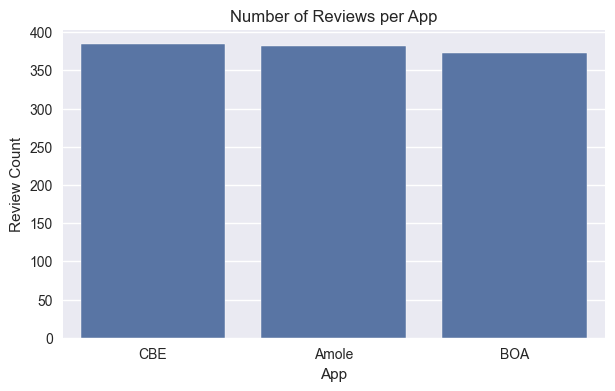

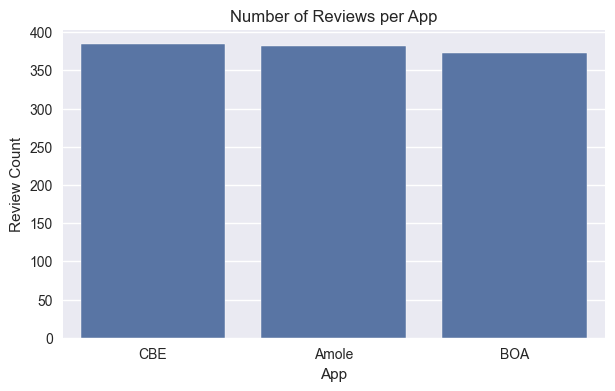

In [13]:
# Cell 5 - Reviews per app
plot_reviews_per_app(merged)


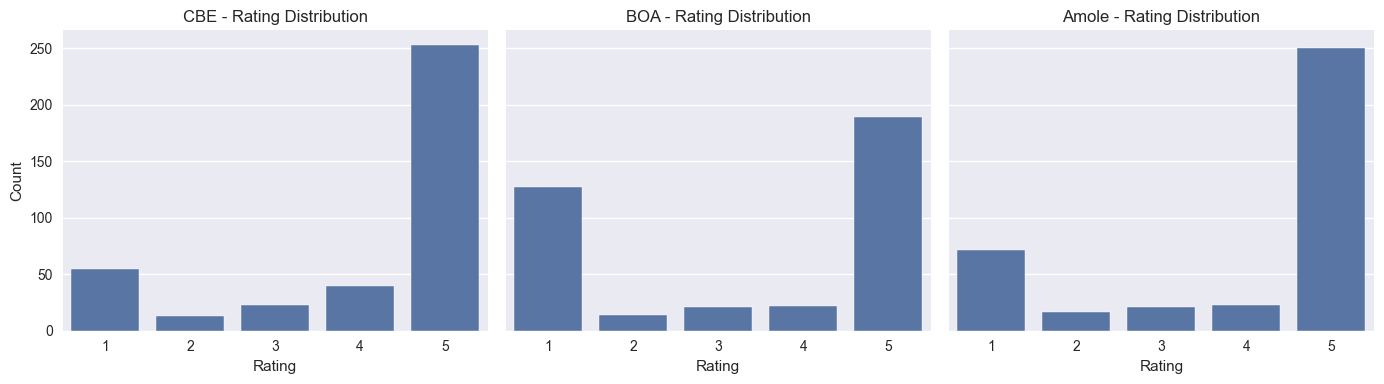

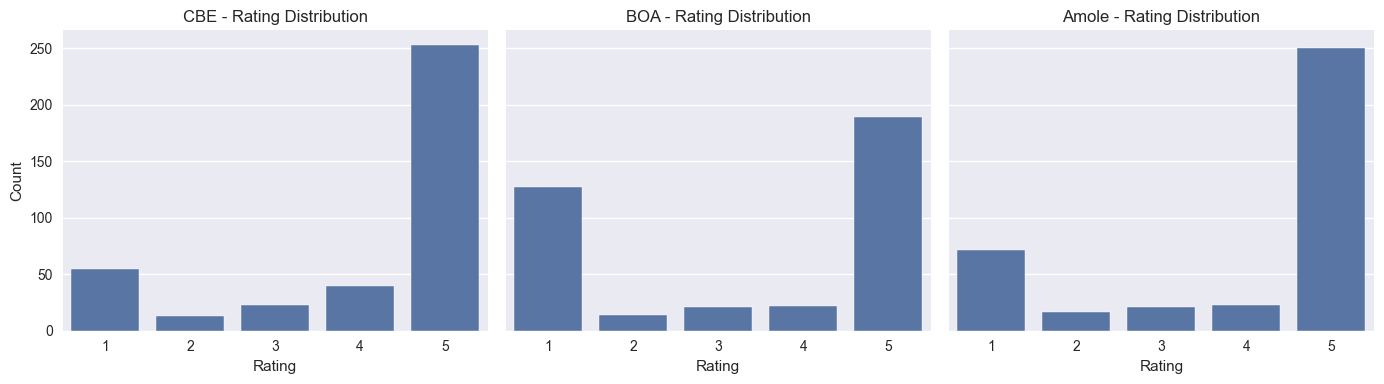

In [14]:
# Cell 6 - Rating distribution
plot_rating_distribution(merged)


c:\Users\FORWARD\Desktop\Elias\Week2\CX_Analytics_for_Fintech_Apps\CX-Analytics-for-Fintech-Apps\scripts\eda_helpers.py:75: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  if save_path:


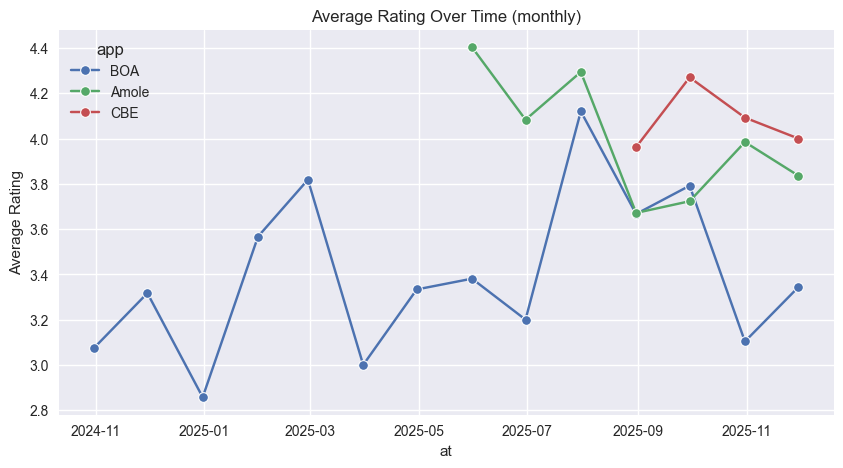

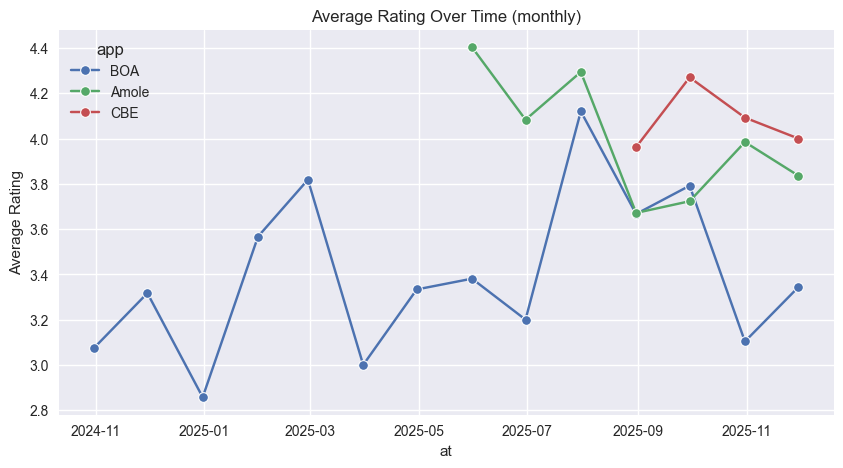

In [15]:
# Cell 7 - Avg rating over time
plot_avg_rating_over_time(merged)


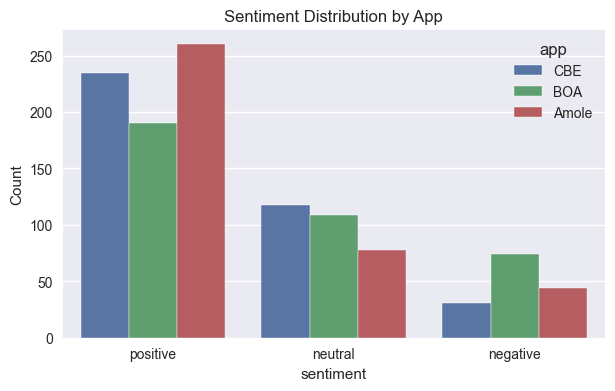

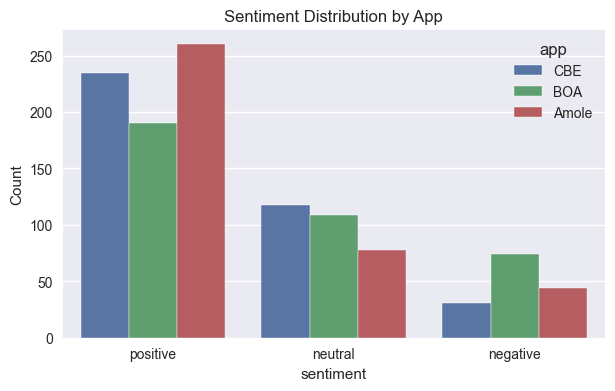

In [16]:
# Cell 8 - Sentiment distribution
plot_sentiment_distribution(merged)


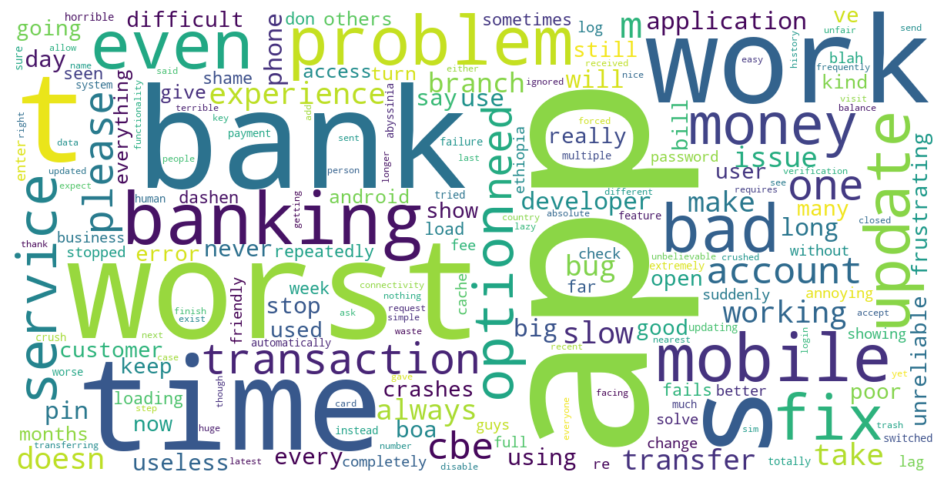

In [17]:
# Cell 9 - Wordcloud negative
neg = merged[merged['sentiment']=="negative"]
if neg.empty:
    print("No negative reviews found.")
else:
    plot_wordcloud_from_text(neg["clean_content"])



Top negative keywords - CBE


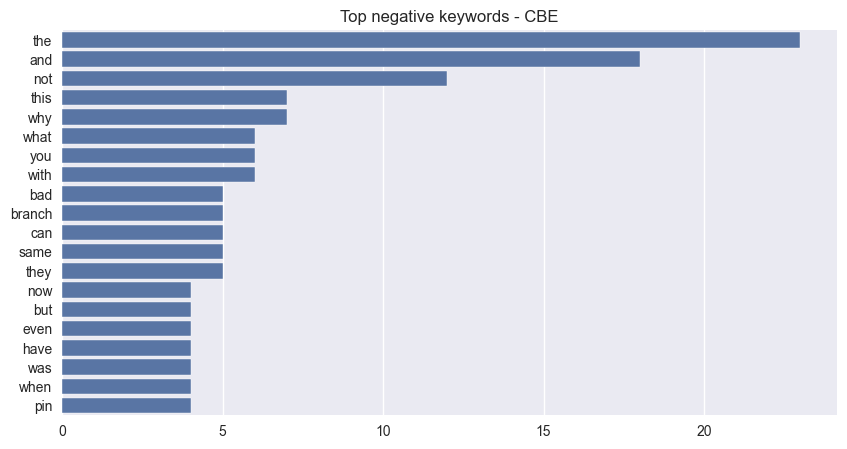


Top negative keywords - BOA


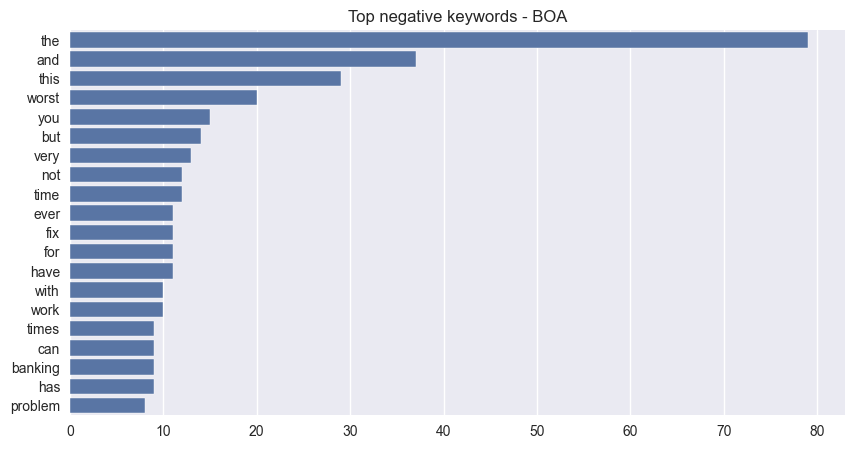


Top negative keywords - Amole


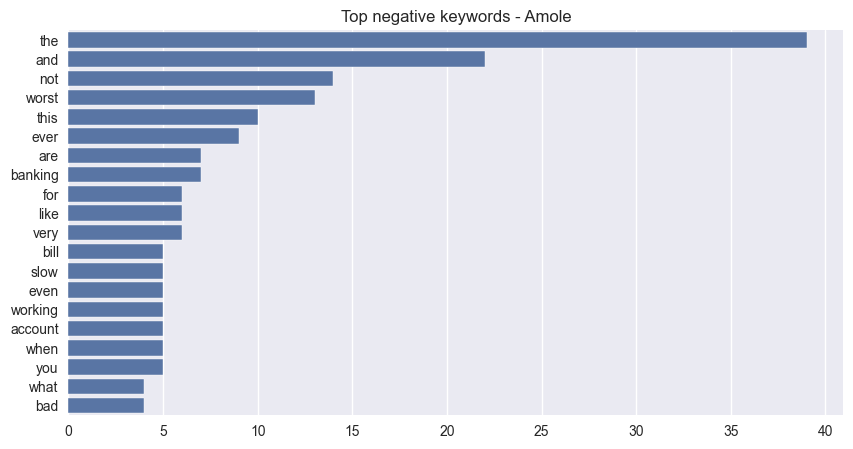

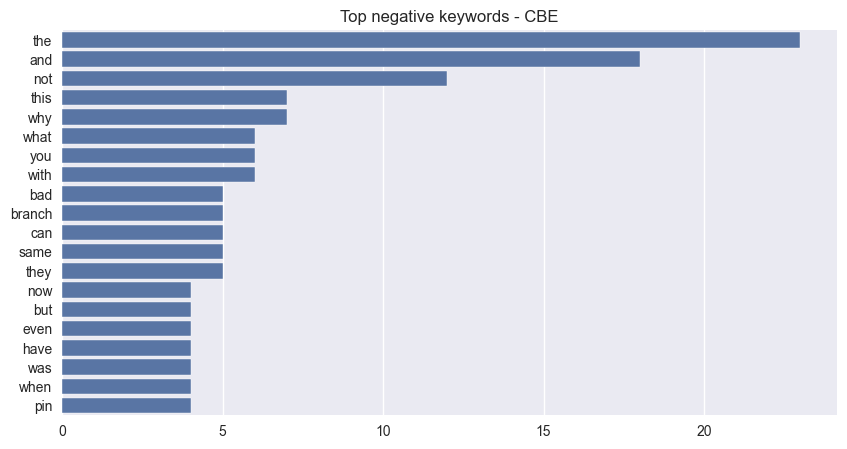

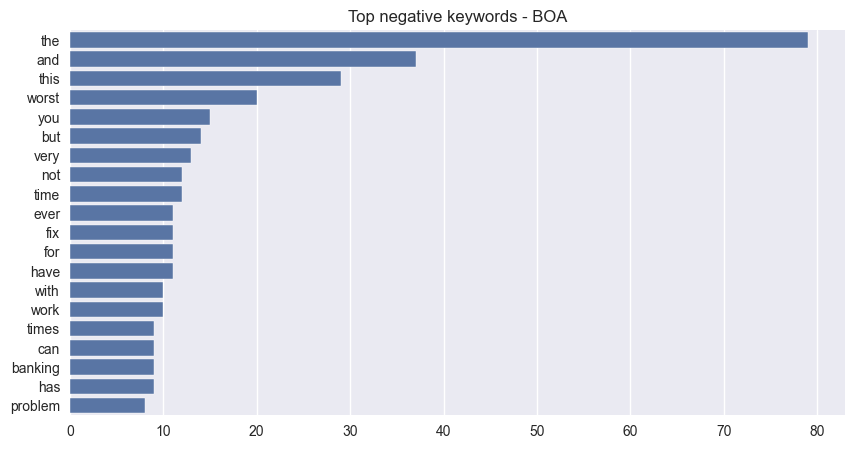

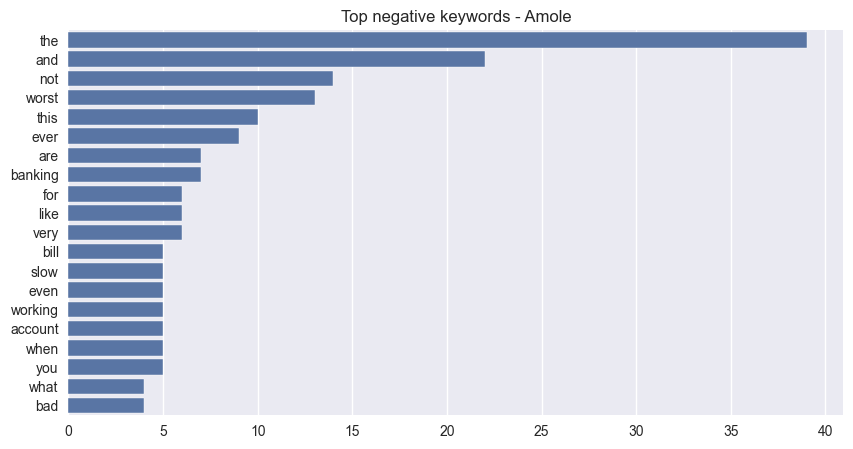

In [18]:
# Cell 10 - Top negative keywords per app
stopwords = set(["app","bank","payment","payments","service","mobile","update","please","bankofabyssinia","cbe"])
for app in merged['app'].unique():
    neg_app = merged[(merged['app']==app) & (merged['sentiment']=="negative")]
    pairs = top_n_words(neg_app['clean_content'], n=30, stopwords=stopwords)
    if pairs:
        print(f"\nTop negative keywords - {app}")
        display(plot_top_keywords_bar(pairs, title=f"Top negative keywords - {app}"))


In [19]:
# Cell 11 - Export summary CSV
summary = merged.groupby(['app','sentiment']).agg({
    'clean_content': 'count',
    'score': ['mean','median']
}).reset_index()
# flatten columns
summary.columns = ['app','sentiment','count','score_mean','score_median']
summary_path = os.path.join(PROCESSED_DATA, "eda_summary_by_app_sentiment.csv")
summary.to_csv(summary_path, index=False)
print("Summary exported:", summary_path)
display(summary)


Summary exported: c:\Users\FORWARD\Desktop\Elias\Week2\CX_Analytics_for_Fintech_Apps\CX-Analytics-for-Fintech-Apps\data\processed\eda_summary_by_app_sentiment.csv


,app,sentiment,count,score_mean,score_median
0,Amole,negative,44,1.431818,1.0
1,Amole,neutral,78,3.769231,5.0
2,Amole,positive,260,4.434615,5.0
3,BOA,negative,74,1.405405,1.0
4,BOA,neutral,109,3.284404,4.0
5,BOA,positive,190,4.152632,5.0
6,CBE,negative,31,2.387097,2.0
7,CBE,neutral,118,3.593220,5.0
8,CBE,positive,235,4.582979,5.0
